In [75]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

A partir de la teoria llegamos a una ecuacion la cual es generada por diferentes variables como la carga la distancia la masa etc..

In [76]:
#q en C
q=3*(10**(-4))
# ke en Nm^2/c^2
ke=9*(10**(-9))
#mg en N 
mg=114.6
#L en m
L=5
a= sym.Symbol('a',real=True)
c1=((q**2)*ke*(4+np.sqrt(2)))
c2=(4*np.sqrt(2)*mg*(L^2))
c3=(c1/c2)
c=c3**2
c

9.339540484066588e-37

Reemplazando las variables en c obtenemos la siguiente ecuacion

In [77]:
xa = lambda a: np.sin(a)
function = lambda a: (np.sin(a))**6 + 9.339540484066588e-37*((np.sin(a))**2) -9.339540484066588e-37


Ahora sacaremos las 6 raices complejas para la variable x:

C:\Users\DIEGOM~1\AppData\Local\Temp/ipykernel_7320/3025837595.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  xn1 = xn-(f(xn)/df(f,xn))
C:\Users\DIEGOM~1\AppData\Local\Temp/ipykernel_7320/3025837595.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  error=np.abs(f(xn)/df(f,xn))
C:\Users\DIEGOM~1\AppData\Local\Temp/ipykernel_7320/1504040889.py:2: RuntimeWarning: invalid value encountered in sin
  function = lambda a: (np.sin(a))**6 + 9.339540484066588e-37*((np.sin(a))**2) -9.339540484066588e-37


array([-9.887e-07,  9.887e-07,        nan])

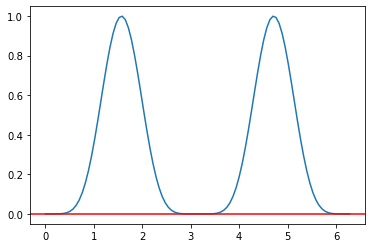

In [78]:


x = np.linspace(0,2*np.pi,100)
y=function(x)
plt.plot(x,y)
plt.axhline(y = 0,color='r')

def Derivada (f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(h*2)

#metemos como parametros una funcion, la derivada, el termino a evaluar el maximo de iteraciones y precision 
def NewtonRampson(f,df,xn,itmax=1000,precision=1e-18):
    #numero de iteraciones y la precision son atractores de la funcion, es como acotarla
    #en ciertos rangos
    error=1
    #empezamos iteracion con 0
    it=0
    while error > precision and it < itmax:
        try:
            xn1 = xn-(f(xn)/df(f,xn))
            #criterio de parada
            error=np.abs(f(xn)/df(f,xn))
        except ZeroDivisionError:
            print('division por cero')
        xn=xn1
        it+=1
    if it==itmax:
        return False
    else:
        return xn
raiz=NewtonRampson(function, Derivada, 1)

#hallaremos multiples raices muchas veces se pareceran, por eso redondeamos a cierto numero
#y comparamos si existe una en el arreglo
def GetAllRoots(x, tolerancia=10):
    raices=np.array([])
    #Abrimos un arreglo de numeros, con listas y recorremos el arreglo que insertamos
    for i in x:
        raiz=NewtonRampson(function, Derivada, i)
        #si existe la raiz
        if raiz!= False:
            #redondea a 10 cifras
            croot=np.round(raiz,tolerancia)
            if croot not in raices:
                #se agrega en el arreglo numerico raices esta variable
                raices=np.append(raices, croot)
    raices.sort()
    #arregla el de cierta forma el arreglo
    return raices
raices=GetAllRoots(x)
raices